In [1]:
import numpy as np
import autoencoder
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from scipy.signal import hann

In [2]:
days = '012'
fullXtrain = np.load(f'./datasets/Xtrain_tx0_days{days}.npy')
fullYtrain = np.load(f'./datasets/Ytrain_tx0_days{days}.npy')
fullXtest = np.load('./datasets/Xtest_tx0_days3.npy')
fullYtest = np.load('./datasets/Ytest_tx0_days3.npy')

In [3]:
filXtrain = []
filYtrain = []
filXtest = []
filYtest = []

for i in range(len(fullXtrain)):
    if fullYtrain[i] not in [5,8,14,24,25]:
        filXtrain.append(fullXtrain[i])
        filYtrain.append(fullYtrain[i])

for i in range(len(fullXtest)):
    if fullYtest[i] not in [5,8,14,24,25]:
        filXtest.append(fullXtest[i])
        filYtest.append(fullYtest[i])

In [4]:
rawXtrain, Ytrain = shuffle(filXtrain, filYtrain, n_samples=1*5000)
rawXtest, Ytest = shuffle(filXtest, filYtest, n_samples=2000)
rawXdev, Ydev = shuffle(filXtest, filYtest, n_samples=2000)

In [5]:
Xtrain = np.abs(np.fft.fft(rawXtrain * hann(len(rawXtrain[0]))))
Xtest = np.abs(np.fft.fft(rawXtest * hann(len(rawXtrain[0]))))
Xdev = np.abs(np.fft.fft(rawXdev * hann(len(rawXtrain[0]))))

In [6]:
autoenc, encoder = autoencoder.model(200, 12, loss='mean_squared_error')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 64)                12864     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 12)                396       
                                                                 
 dense_4 (Dense)             (None, 32)                416       
                                                                 
 dense_5 (Dense)             (None, 64)                2112  

Epoch 1/100
157/157 [==============================] - 1s 4ms/step - loss: 0.3597 - val_loss: 0.1946
Epoch 2/100
157/157 [==============================] - 1s 4ms/step - loss: 0.1257 - val_loss: 0.1241
Epoch 3/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0953 - val_loss: 0.1090
Epoch 4/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0843 - val_loss: 0.0999
Epoch 5/100
157/157 [==============================] - 1s 3ms/step - loss: 0.0783 - val_loss: 0.0961
Epoch 6/100
157/157 [==============================] - 1s 4ms/step - loss: 0.0756 - val_loss: 0.0936
Epoch 7/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0730 - val_loss: 0.0890
Epoch 8/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0703 - val_loss: 0.0876
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 0.0677 - val_loss: 0.0843
Epoch 10/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0649 - val_lo

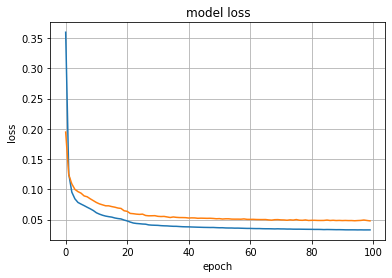

In [7]:
history = autoenc.fit(Xtrain, Xtrain, validation_data=(Xdev, Xdev), epochs=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch'); plt.ylabel('loss')
plt.title('model loss'); plt.grid()
plt.show()

In [8]:
encXtest = encoder.predict(Xtest)
encXtrain = encoder.predict(Xtrain)
encXdev = encoder.predict(Xdev)

63/63 [==============================] - 0s 2ms/step


In [10]:
classifier = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='cosine')
classifier.fit(encXtrain, Ytrain)

KNeighborsClassifier(metric='cosine', n_neighbors=4, weights='distance')

In [11]:
#print("Train score: ", classifier.score(encXtrain, Ytrain))
print("Test score: ", classifier.score(encXtest, Ytest))
print("Dev score: ", classifier.score(encXdev, Ydev))

Test score:  0.918
Dev score:  0.902


In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_confusion_matrix(classifier, encXtest, Ytest, ax=ax)

In [ ]:
0.8525
0.8255
0.8465